<a href="https://colab.research.google.com/github/miftaadiwira16/Indonesia-s-Trending-YouTube-Video-Analysis-in-July-2022-Using-Python/blob/main/Indonesia's_Trending_YouTube_Video_Analysis_in_July_2022_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indonesia's Trending YouTube Video Analysis in July 2022

### Created by Mifta Adiwira Jati Jaka

## About Dataset

Youtube, as a form of mass media in development, increasingly sophisticated technology, has a variety of viewers who meet every day their need to get information. Trending YouTube videos help viewers see what's happening on Youtube, especially in Indonesia.

Here's my diagnostic analysis of Indonesia's trending Youtube videos in July 2022. It contains three subjects:

- What video categories are trending in July 2022?
- What is the most frequent title keyword?
- What videos are trending and how many views?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
import io

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

In [2]:
from google.colab import files
uploaded = files.upload()

Saving category.json to category.json


In [3]:
from google.colab import files
uploaded = files.upload()

Saving trending.csv to trending.csv


In [4]:
df = pd.read_csv(io.StringIO(uploaded['trending.csv'].decode('utf-8')))
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,video_id,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,...,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time
0,NaN,2021-02-05T09:00:34Z,UCEf_Bc-KVd7onSeifS3py9g,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",NaN,NaN,NaN,SMTOWN,NaN,...,True,True,NaN,NaN,7806846.0,857902.0,24078.0,0,94961.0,2021-02-07 05:46:51.832614+00:00
1,NaN,2021-02-04T15:54:08Z,UCYEa4_MC7OFjcWrO6SO-u8g,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",NaN,NaN,NaN,Indonesia Lawyers Club,"['tvone', 'tv one', 'tvonenews', 'indonesia la...",...,False,True,NaN,NaN,885038.0,6765.0,1263.0,0,6365.0,2021-02-07 05:46:51.832649+00:00
2,NaN,2021-02-06T03:00:22Z,UCu12RxQjRQyh79YBYvEDkOg,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,NaN,NaN,NaN,Motomobi,"['MotoMobi', 'Mobil', 'motor', 'review', 'indo...",...,False,True,NaN,NaN,889708.0,47895.0,532.0,0,8785.0,2021-02-07 05:46:51.832664+00:00
3,NaN,2021-02-05T20:26:08Z,UCCuzDCoI3EUOo_nhCj4noSw,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,NaN,NaN,NaN,yb,NaN,...,False,True,NaN,NaN,1006854.0,91973.0,3967.0,0,12957.0,2021-02-07 05:46:51.832678+00:00
4,NaN,2021-02-03T23:14:54Z,UC14UlmYlSNiQCBe9Eookf_A,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",NaN,NaN,NaN,FC Barcelona,"['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...",...,False,True,NaN,NaN,6275035.0,218131.0,4289.0,0,12799.0,2021-02-07 05:46:51.832730+00:00


## Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95689 entries, 0 to 95688
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   video_id           42567 non-null  object 
 1   publish_time       95689 non-null  object 
 2   channel_id         95689 non-null  object 
 3   title              95689 non-null  object 
 4   description        91762 non-null  object 
 5   thumbnail_url      42567 non-null  object 
 6   thumbnail_width    42567 non-null  float64
 7   thumbnail_height   42567 non-null  float64
 8   channel_name       95689 non-null  object 
 9   tags               82473 non-null  object 
 10  category_id        95689 non-null  int64  
 11  live_status        95689 non-null  object 
 12  local_title        95689 non-null  object 
 13  local_description  91762 non-null  object 
 14  duration           95689 non-null  object 
 15  dimension          95689 non-null  object 
 16  definition         956

## Data Cleansing

publish time and trending time is still string. I will change into datetime.

In [6]:
df['trending_time'] = pd.to_datetime(df['trending_time'], format='%Y-%m-%dT%H:%M:%S.%f')
df['trending_time'].head()

0   2021-02-07 05:46:51.832614+00:00
1   2021-02-07 05:46:51.832649+00:00
2   2021-02-07 05:46:51.832664+00:00
3   2021-02-07 05:46:51.832678+00:00
4   2021-02-07 05:46:51.832730+00:00
Name: trending_time, dtype: datetime64[ns, UTC]

In [7]:
df['trending_time'] = df['trending_time'].dt.strftime('%Y-%m-%d')
df['trending_time']

0        2021-02-07
1        2021-02-07
2        2021-02-07
3        2021-02-07
4        2021-02-07
            ...    
95684    2022-07-25
95685    2022-07-25
95686    2022-07-25
95687    2022-07-25
95688    2022-07-25
Name: trending_time, Length: 95689, dtype: object

In [8]:
df['trending_time'] = pd.to_datetime(df['trending_time'])
df['trending_time'].head()

0   2021-02-07
1   2021-02-07
2   2021-02-07
3   2021-02-07
4   2021-02-07
Name: trending_time, dtype: datetime64[ns]

In [9]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%SZ')
df['publish_time'].head()

0   2021-02-05 09:00:34
1   2021-02-04 15:54:08
2   2021-02-06 03:00:22
3   2021-02-05 20:26:08
4   2021-02-03 23:14:54
Name: publish_time, dtype: datetime64[ns]

In [10]:
df.insert(4, 'publish_date', df['publish_time'].dt.date)

In [11]:
df['publish_time'] = df['publish_time'].dt.time

In [12]:
df[['publish_date', 'publish_time']].head()

,publish_date,publish_time
0,2021-02-05,09:00:34
1,2021-02-04,15:54:08
2,2021-02-06,03:00:22
3,2021-02-05,20:26:08
4,2021-02-03,23:14:54


In [13]:
df['publish_date'] = pd.to_datetime(df['publish_date'], format='%Y-%m-%d')
df['publish_date'].head()

0   2021-02-05
1   2021-02-04
2   2021-02-06
3   2021-02-05
4   2021-02-03
Name: publish_date, dtype: datetime64[ns]

In [14]:
df[["view","like","dislike","comment"]] = df[["view","like","dislike","comment"]].fillna(0).astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95689 entries, 0 to 95688
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           42567 non-null  object        
 1   publish_time       95689 non-null  object        
 2   channel_id         95689 non-null  object        
 3   title              95689 non-null  object        
 4   publish_date       95689 non-null  datetime64[ns]
 5   description        91762 non-null  object        
 6   thumbnail_url      42567 non-null  object        
 7   thumbnail_width    42567 non-null  float64       
 8   thumbnail_height   42567 non-null  float64       
 9   channel_name       95689 non-null  object        
 10  tags               82473 non-null  object        
 11  category_id        95689 non-null  int64         
 12  live_status        95689 non-null  object        
 13  local_title        95689 non-null  object        
 14  local_

Processing data types

In [16]:
type_int_list = ['view', 'like', 'dislike', 'comment']
for column in type_int_list:
    df[column] = df[column].astype(int)

In [17]:
type_str_list = ['category_id']
for column in type_str_list:
    df[column] = df[column].astype(str)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95689 entries, 0 to 95688
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           42567 non-null  object        
 1   publish_time       95689 non-null  object        
 2   channel_id         95689 non-null  object        
 3   title              95689 non-null  object        
 4   publish_date       95689 non-null  datetime64[ns]
 5   description        91762 non-null  object        
 6   thumbnail_url      42567 non-null  object        
 7   thumbnail_width    42567 non-null  float64       
 8   thumbnail_height   42567 non-null  float64       
 9   channel_name       95689 non-null  object        
 10  tags               82473 non-null  object        
 11  category_id        95689 non-null  object        
 12  live_status        95689 non-null  object        
 13  local_title        95689 non-null  object        
 14  local_

Importing json file and Adding Category column

In [19]:
import json
# creates a dictionary that maps `category_id` to `category`
id_to_category = {}

with open('category.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']

id_to_category

{'1': 'Film & Animation',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '2': 'Autos & Vehicles',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [20]:
df.insert(4, 'category', df['category_id'].map(id_to_category))
df[['category_id', 'category']].head()

,category_id,category
0,10,Music
1,25,News & Politics
2,2,Autos & Vehicles
3,20,Gaming
4,17,Sports


In [21]:
df.head()

,video_id,publish_time,channel_id,title,category,publish_date,description,thumbnail_url,thumbnail_width,thumbnail_height,...,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time
0,NaN,09:00:34,UCEf_Bc-KVd7onSeifS3py9g,aespa 에스파 'Forever (약속)' MV,Music,2021-02-05,"aespa's new single ""Forever"" is out!\nListen a...",NaN,NaN,NaN,...,True,True,NaN,NaN,7806846,857902,24078,0,94961,2021-02-07
1,NaN,15:54:08,UCYEa4_MC7OFjcWrO6SO-u8g,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,News & Politics,2021-02-04,"Jakarta, https://www.tvonenews.com - Ketua umu...",NaN,NaN,NaN,...,False,True,NaN,NaN,885038,6765,1263,0,6365,2021-02-07
2,NaN,03:00:22,UCu12RxQjRQyh79YBYvEDkOg,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Autos & Vehicles,2021-02-06,Road Party Season 2: Cabriolet Challenge\n\nEp...,NaN,NaN,NaN,...,False,True,NaN,NaN,889708,47895,532,0,8785,2021-02-07
3,NaN,20:26:08,UCCuzDCoI3EUOo_nhCj4noSw,With Windah Basudara & Hans,Gaming,2021-02-05,Join this channel to get access to perks:\nhtt...,NaN,NaN,NaN,...,False,True,NaN,NaN,1006854,91973,3967,0,12957,2021-02-07
4,NaN,23:14:54,UC14UlmYlSNiQCBe9Eookf_A,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,Sports,2021-02-03,"With just two minutes to play, Barça looked to...",NaN,NaN,NaN,...,False,True,NaN,NaN,6275035,218131,4289,0,12799,2021-02-07


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95689 entries, 0 to 95688
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           42567 non-null  object        
 1   publish_time       95689 non-null  object        
 2   channel_id         95689 non-null  object        
 3   title              95689 non-null  object        
 4   category           95235 non-null  object        
 5   publish_date       95689 non-null  datetime64[ns]
 6   description        91762 non-null  object        
 7   thumbnail_url      42567 non-null  object        
 8   thumbnail_width    42567 non-null  float64       
 9   thumbnail_height   42567 non-null  float64       
 10  channel_name       95689 non-null  object        
 11  tags               82473 non-null  object        
 12  category_id        95689 non-null  object        
 13  live_status        95689 non-null  object        
 14  local_

### Correlation analysis between variables

In [23]:
special_columns = ['view', 'like', 'dislike', 'comment'] # only looking at correlations between these variables
corr_matrix = df[special_columns].corr()
corr_matrix

,view,like,dislike,comment
view,1.000000,0.876571,0.601727,0.547035
like,0.876571,1.000000,0.511607,0.678630
dislike,0.601727,0.511607,1.000000,0.296679
comment,0.547035,0.678630,0.296679,1.000000


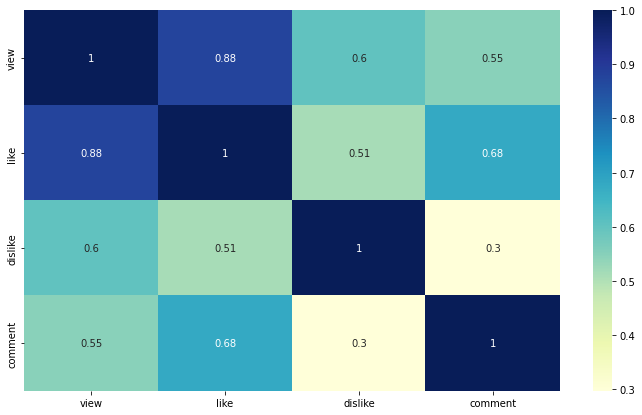

In [24]:
plt.figure(figsize=(12,7))
sns.heatmap(df[special_columns].corr(), annot=True, cmap='YlGnBu')
plt.show()

It appears view and like has high correlation (88%), it makes sense because when viewers watch video on youtube, there's a big possibility for viewers to click like button. 

## Creating New Dataset for Summary

In [25]:
df_new = df[["video_id","title","category","view","like","dislike","comment","publish_date","trending_time"]]

In [26]:
df_new

,video_id,title,category,view,like,dislike,comment,publish_date,trending_time
0,NaN,aespa 에스파 'Forever (약속)' MV,Music,7806846,857902,24078,94961,2021-02-05,2021-02-07
1,NaN,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,News & Politics,885038,6765,1263,6365,2021-02-04,2021-02-07
2,NaN,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Autos & Vehicles,889708,47895,532,8785,2021-02-06,2021-02-07
3,NaN,With Windah Basudara & Hans,Gaming,1006854,91973,3967,12957,2021-02-05,2021-02-07
4,NaN,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,Sports,6275035,218131,4289,12799,2021-02-03,2021-02-07
...,...,...,...,...,...,...,...,...,...
95684,PlpqhZiumDM,SHATTERED // Episode 5: DIMENSION Cinematic - ...,Gaming,4269660,260413,0,11046,2022-06-20,2022-07-25
95685,SLji9fZ9NrM,Maafkan Aku (Enda) - Farel Prayoga I Official ...,Music,337278,4963,0,177,2022-06-23,2022-07-25
95686,Nl1gfDk3YL0,BIKIN HADIAH UNTUK BAPAK JOKOWI DARI 1000 RUBIK!!,Entertainment,1187459,39629,0,1570,2022-06-21,2022-07-25
95687,5gNvddIOEC0,Hantu di San Francisco – DMS [ Penelusuran ],People & Blogs,1280286,72833,0,3060,2022-06-19,2022-07-25


Filter by Trending Time (July 2022)

In [27]:
df_new_july = df_new[(df_new['trending_time'] > '2022-07-01') & (df_new['trending_time'] < '2022-07-31')]
df_new_july

,video_id,title,category,view,like,dislike,comment,publish_date,trending_time
91570,pKdBFeewZYE,j-hope 'MORE' Official MV,Music,17853287,3716867,0,789057,2022-07-01,2022-07-02
91571,sJkojTQhUyc,"JEJE PENGHUNI STASIUN DUKUH ATAS, PERNAH CABUT...",Entertainment,957294,75204,0,1581,2022-07-01,2022-07-02
91572,QZ3-I9u-gHA,TIARA - KRIS (LIVE COVER INDAH YASTAMI),Music,1623481,40255,0,3707,2022-06-29,2022-07-02
91573,GsGsFZeU_04,TROFEO RONALDINHO (RANS FC VS AREMA FC VS PERS...,Entertainment,4774735,93195,0,97,2022-06-26,2022-07-02
91574,h0U8S9YMCV8,"SHOCK! TERNYATA PONARI NASIBNYA SEPERTI INI! ""...",People & Blogs,1799578,24926,0,2410,2022-06-28,2022-07-02
...,...,...,...,...,...,...,...,...,...
95684,PlpqhZiumDM,SHATTERED // Episode 5: DIMENSION Cinematic - ...,Gaming,4269660,260413,0,11046,2022-06-20,2022-07-25
95685,SLji9fZ9NrM,Maafkan Aku (Enda) - Farel Prayoga I Official ...,Music,337278,4963,0,177,2022-06-23,2022-07-25
95686,Nl1gfDk3YL0,BIKIN HADIAH UNTUK BAPAK JOKOWI DARI 1000 RUBIK!!,Entertainment,1187459,39629,0,1570,2022-06-21,2022-07-25
95687,5gNvddIOEC0,Hantu di San Francisco – DMS [ Penelusuran ],People & Blogs,1280286,72833,0,3060,2022-06-19,2022-07-25


According to this website: https://blog.youtube/news-and-events/update-to-youtube/, The dislike shows 0 because from November 2021, youtube has hidden dislikes on all videos.

Sorting by Views

In [28]:
df_new_july.sort_values("view",ascending=False).head(20)

,video_id,title,category,view,like,dislike,comment,publish_date,trending_time
95611,f6YDKF0LVWw,"NAYEON ""POP!"" M/V",Music,84288214,3054723,0,939542,2022-06-24,2022-07-25
95472,f6YDKF0LVWw,"NAYEON ""POP!"" M/V",Music,83180166,3037504,0,936237,2022-06-24,2022-07-24
95320,f6YDKF0LVWw,"NAYEON ""POP!"" M/V",Music,81988450,3017707,0,934745,2022-06-24,2022-07-23
92388,a7GITgqwDVg,Charlie Puth - Left And Right (feat. Jung Kook...,Music,80882643,5488579,0,354929,2022-06-24,2022-07-06
95577,Hbb5GPxXF1w,ITZY “SNEAKERS” M/V @ITZY,Music,78083815,1696360,0,322306,2022-07-15,2022-07-25
92185,a7GITgqwDVg,Charlie Puth - Left And Right (feat. Jung Kook...,Music,77637009,5402959,0,349816,2022-06-24,2022-07-05
94870,dYRITmpFbJ4,aespa 에스파 'Girls' MV,Music,77402665,1546442,0,282326,2022-07-08,2022-07-20
95427,Hbb5GPxXF1w,ITZY “SNEAKERS” M/V @ITZY,Music,76830612,1674093,0,315973,2022-07-15,2022-07-24
94714,dYRITmpFbJ4,aespa 에스파 'Girls' MV,Music,76586593,1534650,0,273987,2022-07-08,2022-07-19
94559,dYRITmpFbJ4,aespa 에스파 'Girls' MV,Music,75715347,1521406,0,266211,2022-07-08,2022-07-18


In [42]:
df_new_july["category"].value_counts().sort_values(ascending=False)

Music                   1394
Entertainment           1328
People & Blogs           473
Gaming                   281
Sports                   141
Film & Animation         123
Autos & Vehicles         109
News & Politics           67
Science & Technology      61
Comedy                    61
Pets & Animals            32
Travel & Events           31
Education                 12
Howto & Style              6
Name: category, dtype: int64

In [43]:
df_new_july["category"].value_counts(normalize=True).sort_values(ascending=False)

Music                   0.338432
Entertainment           0.322408
People & Blogs          0.114834
Gaming                  0.068220
Sports                  0.034232
Film & Animation        0.029862
Autos & Vehicles        0.026463
News & Politics         0.016266
Science & Technology    0.014809
Comedy                  0.014809
Pets & Animals          0.007769
Travel & Events         0.007526
Education               0.002913
Howto & Style           0.001457
Name: category, dtype: float64

## Data Visualization

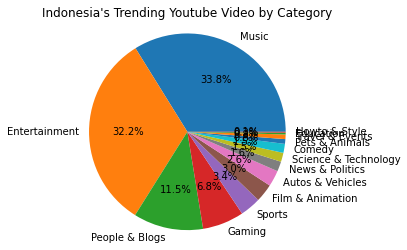

In [44]:
df_new_july_pie = df_new_july["category"].value_counts(normalize=True).mul(100).sort_values(ascending=False)

my_labels = 'Music','Entertainment','People & Blogs','Gaming','Sports', 'Film & Animation','Autos & Vehicles','News & Politics','Science & Technology','Comedy','Pets & Animals','Travel & Events','Education','Howto & Style'
#'Film & Animation','Autos & Vehicles','News & Politics','Science & Technology','Comedy','Pets & Animals','Travel & Events','Education','Howto & Style'
plt.pie(df_new_july_pie,labels=my_labels,autopct='%1.1f%%')
plt.title("Indonesia's Trending Youtube Video by Category")
plt.axis('equal')
plt.show()

Wordcloud

In [31]:
def wordcloud_plot(wordcloud, title, show=True, ax=None):
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6), facecolor='#F5F7FA')
    ax.set_facecolor('#F5F7FA')

  ax.imshow(wordcloud)
  ax.axis('off')
  ax.set_title(title, size=14, fontweight='bold', pad=20)

  if show:
    plt.show()

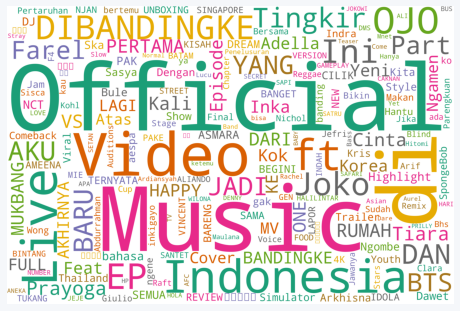

In [32]:
wordcloud = WordCloud(width = 3000, height = 2000, 
                      random_state=1, background_color='#FFFFFF', 
                      colormap='Dark2', collocations=False, 
                      stopwords = STOPWORDS).generate(' '.join(df_new_july['title']))

wordcloud_plot(wordcloud, title="", show=False)

# fname = 'employment-title-wordcloud.svg'
# save_fig(fname)

plt.show()

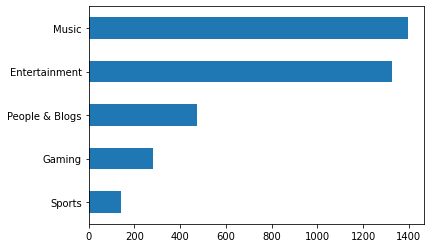

In [33]:
df_new_july["category"].value_counts()[:5].sort_values(ascending=True).plot(kind='barh')

Text(-0.25, 38, "Percentage of Indonesia's Trending Youtube Video by Category")

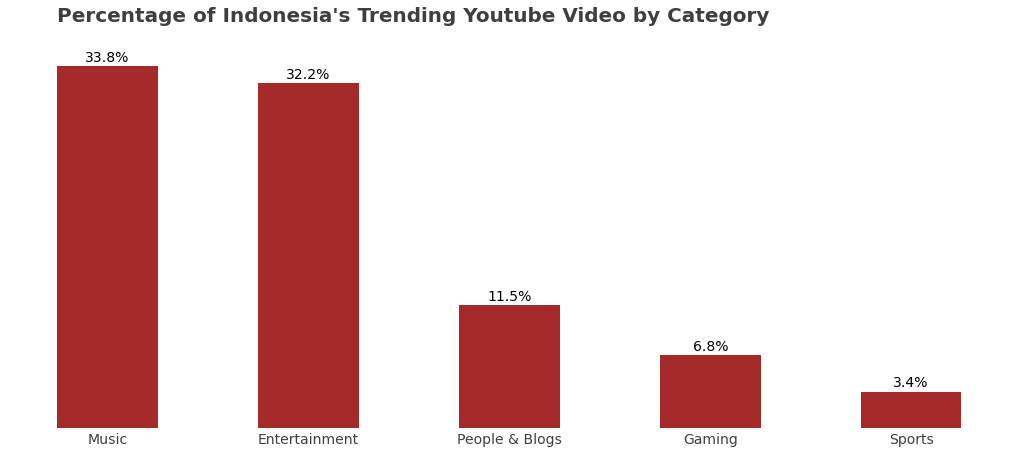

In [45]:
ax = df_new_july["category"].value_counts(normalize=True).mul(100).sort_values(ascending=False).head(5).plot.bar(figsize=(18,7), color='#A52A2A')

# Remove spines
sns.despine(left=True, bottom=True)

# Label bars with percentages
for p in ax.patches:
	y = p.get_height()
	x = p.get_x() + p.get_width() / 2

	# Label of bar height
	label = "{:.1f}%".format(y)

	# Annotate plot
	ax.annotate(
    	label,
    	xy=(x, y),
    	xytext=(0, 5),
    	textcoords="offset points",
    	ha="center",
    	fontsize=14,
	)

# Remove y axis
ax.get_yaxis().set_visible(False)

# Increase x ticks label size, rotate them by 90 degrees, and remove tick lines
plt.tick_params(axis="x", labelsize=14, rotation=0, length=0)

# Increase x ticks transparency
plt.xticks(alpha=0.75)

# Font for title
title_font = {
	"size": 20,
	"alpha": 0.75
}

# Title
plt.text(
	x=-0.25,
	y=38,
	s="Percentage of Indonesia's Trending Youtube Video by Category",
	ha="left",
	fontdict=title_font,
  fontweight="bold"
)

We see that there is one more than video title in the dataset and the number of views is different from each other.

So we will sort it correctly if we take the maximum value of views for each video title.

Create New Dataset by Grouping

We sort the video title in "df_new" dataset and choose the maximum value for numerical variables.Then we move them to a new dataset

In [36]:
df_un_title_max = df_new_july.groupby("title").agg({"view":"max","like":"max","dislike":"max","comment":"max","trending_time":"max","publish_date":"max"})
df_un_title_max.sort_values("view",ascending=False).head(25)

,view,like,dislike,comment,trending_time,publish_date
title,,,,,,
"NAYEON ""POP!"" M/V",84288214,3054723,0,939542,2022-07-25,2022-06-24
Charlie Puth - Left And Right (feat. Jung Kook of BTS) [Official Video],80882643,5488579,0,354929,2022-07-06,2022-06-24
ITZY “SNEAKERS” M/V @ITZY,78083815,1696360,0,322306,2022-07-25,2022-07-15
aespa 에스파 'Girls' MV,77402665,1546442,0,282326,2022-07-20,2022-07-08
"Galliyan Returns Song: Ek Villain Returns | John,Disha,Arjun,Tara | Ankit T,Manoj M, Mohit S,Ektaa K",61391979,818772,0,33914,2022-07-25,2022-07-04
NCT DREAM 엔시티 드림 'Beatbox' MV,56796334,1627504,0,200929,2022-07-06,2022-05-30
aespa 에스파 'Life's Too Short (English Ver.)' MV,43643927,954555,0,63078,2022-07-25,2022-06-24
j-hope 'MORE' Official MV,36329905,5361624,0,1232149,2022-07-10,2022-07-01
달려라 방탄,31776371,2056189,0,0,2022-07-16,2022-06-10


In [48]:
df_cat_title_view = df_new_july.groupby("title").agg({"view":"max"}).sort_values("view",ascending=False).head(10)
df_cat_title_view

,view
title,
"NAYEON ""POP!"" M/V",84288214
Charlie Puth - Left And Right (feat. Jung Kook of BTS) [Official Video],80882643
ITZY “SNEAKERS” M/V @ITZY,78083815
aespa 에스파 'Girls' MV,77402665
"Galliyan Returns Song: Ek Villain Returns | John,Disha,Arjun,Tara | Ankit T,Manoj M, Mohit S,Ektaa K",61391979
NCT DREAM 엔시티 드림 'Beatbox' MV,56796334
aespa 에스파 'Life's Too Short (English Ver.)' MV,43643927
j-hope 'MORE' Official MV,36329905
달려라 방탄,31776371


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54028 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54028 missing from current font.
  font.set_text

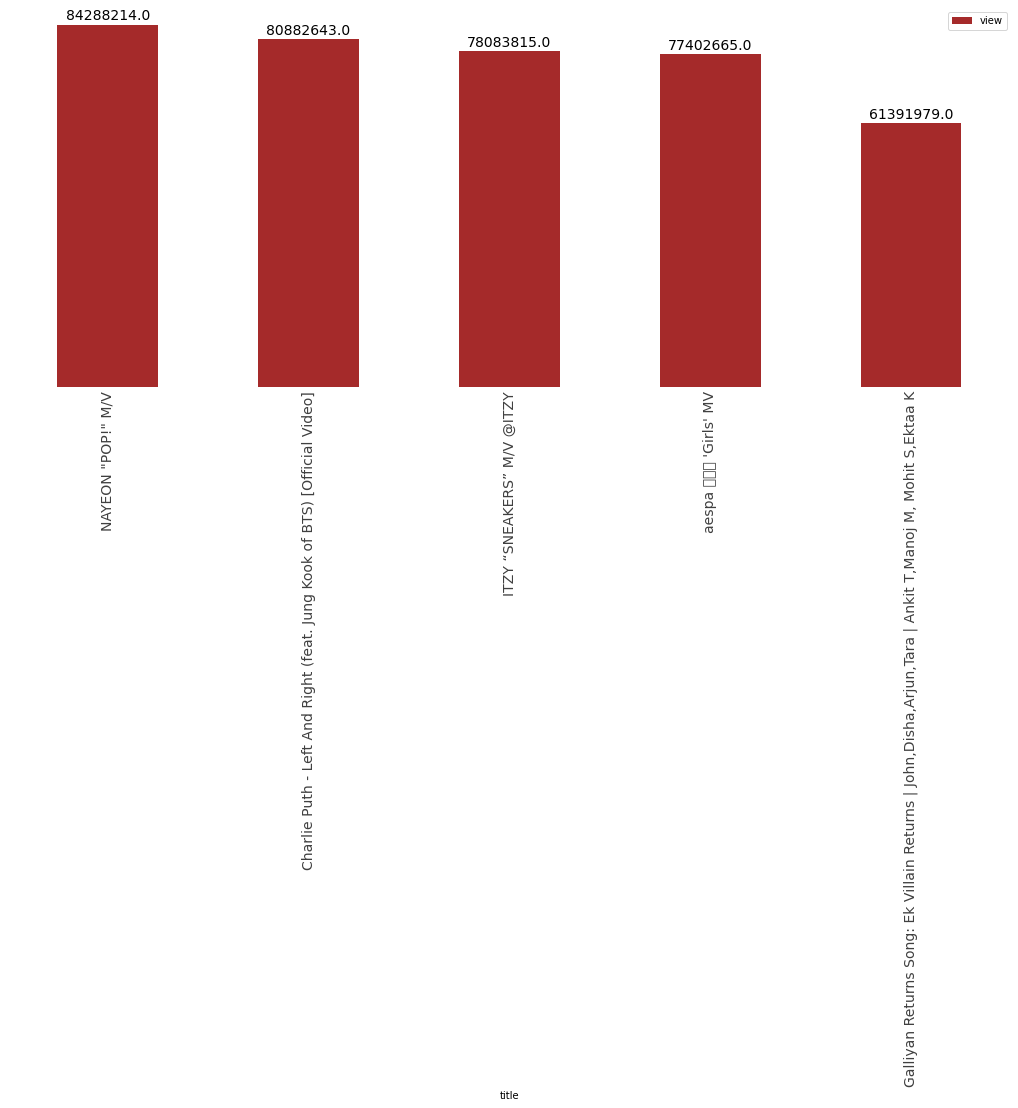

In [58]:
ax = df_cat_title_view.head(5).plot.bar(figsize=(18,7), color='#A52A2A')

# Remove spines
sns.despine(left=True, bottom=True)

# Label bars with percentages
for p in ax.patches:
	y = p.get_height()
	x = p.get_x() + p.get_width() / 2

	# Label of bar height
	label = "{:.1f}".format(y)

	# Annotate plot
	ax.annotate(
    	label,
    	xy=(x, y),
    	xytext=(0, 5),
    	textcoords="offset points",
    	ha="center",
    	fontsize=14,
	)

# Remove y axis
ax.get_yaxis().set_visible(False)

# Increase x ticks label size, rotate them by 90 degrees, and remove tick lines
plt.tick_params(axis="x", labelsize=14, rotation=90, length=0)

# Increase x ticks transparency
plt.xticks(alpha=0.75)

## Conclusion

- In July 2022, many Indonesians like to watch YouTube videos in the music and entertainment categories.
- Many Indonesians watch YouTube videos with titles containing "official", "music", and "video". 
- The Indonesian people's enthusiasm for music is very high, especially those related to Korean music and musicians.